### ***args** 
El asterisco le dice a Python que va a recibir varios argumentos y args (arguments) es el nombre de la variable donde se van a guardar en forma de tupla (Los argumentos se vuelven los elementos de la tupla). 
### ***kwargs*
El doble asterisco ** indica que la variable kwargs (keyword arguments) es un diccionario cuyos índices son palabras clave y cuyos elementos son los valores (los datos) despues del igual =
### Decoradores
Un decorador es una función que toma como input a otra función que a su vez retorna otra función.

Estructura de un decorador en Python:

def function_a(function_b):  
    def function_c()  
        pass  
    return function_c

# Punto 12

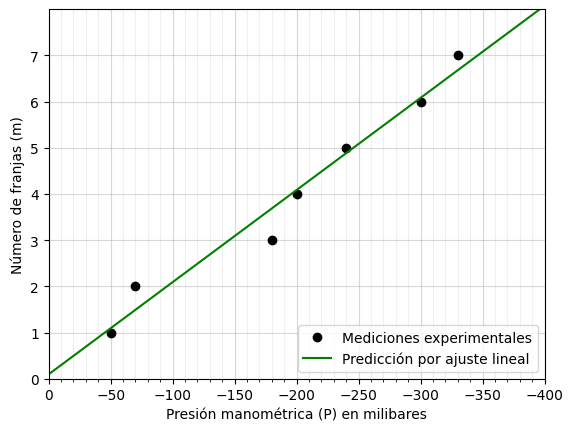

Coeficiente de correlación o r^2: 0.9689857502095551


In [27]:
'''
Basado en datos del laboratorio de óptica (El interferómetro de Mach-Zehnder), determino el ajuste lineal del número de franjas 
que pasan por una marca en la pantalla translúcida en función de la presión manométrica del aire dentro del contenedor transparente 
por el que pasa el haz láser.

'''
import numpy as np
import matplotlib.pyplot as plt

#Datos:
x=[-50,-70,-180,-200,-240,-300,-330] #presión (P)
y=[1,2,3,4,5,6,7] #indice de refracción (n)

n = len(x)
x = np.array(x)
y = np.array(y)
sumx = sum(x) #sumatorias
sumy = sum(y)
sumx2 = sum(x*x)
sumy2 = sum(y*y)
sumxy = sum(x*y)
promx = sumx/n
promy = sumy/n
xint=np.array([0, -400])

m = (sumx*sumy - n*sumxy)/(sumx**2 - n*sumx2)
b = promy - m*promx

#aquí incluyo al cero:
xi=np.array([-0,-50,-70,-180,-200,-240,-300,-330,-400]) #P 
yi=np.array([0,1,2,3,4,5,6,7]) #n

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

# Major ticks every 20, minor ticks every 5
major_ticks = np.arange(0, 8, 1)
minor_ticks = np.arange(0, -400, -10)

ax.set_xticks(minor_ticks, minor=True)
ax.set_yticks(major_ticks)
ax.set_yticks(minor_ticks, minor=True)

ax.grid(which='minor', alpha=0.2)
ax.grid(which='major', alpha=0.5)

plt.plot(x, y, 'o', label='Mediciones experimentales', color="black")
plt.plot(xi, m*xi + b, label='Predicción por ajuste lineal', color="green")
plt.xlabel('Presión manométrica (P) en milibares')
plt.ylabel('Número de franjas (m)')
plt.legend(loc=4)

plt.xlim([0, -400]) #intervalo en x donde grafico
plt.ylim([0, 8]) #intervalo en y donde grafico
plt.show()

#Cálculo del el coeficiente de determinación (R2).
'''Interpretación: Si R=1.0, entonces el modelo lineal predice con perfecta precisión. 
Si R=0.0, el ajuste lineal no predice con presición en absoluto.'''

sigmax = np.sqrt(sumx2/n - promx**2)
sigmay = np.sqrt(sumy2/n - promy**2)
sigmaxy = sumxy/n - promx*promy
R2 = (sigmaxy/(sigmax*sigmay))**2
print("Coeficiente de correlación o r^2:", R2)

# Punto 15

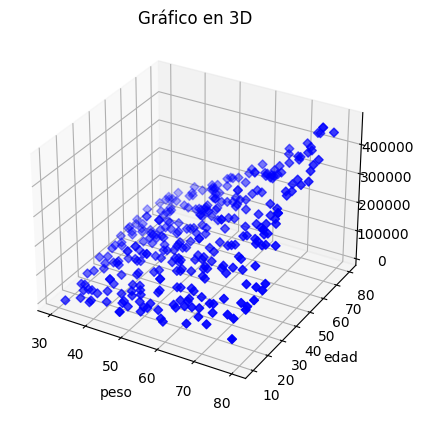

In [54]:
import random
import matplotlib.pyplot as plt
import pandas as pd
import math

#punto 15

def generar_tabla_prueba(cant_valores):
    """
    El método generar_tabla_prueba() crea una tabla con datos numéricos genéricos de acuerdo
    a una cantidad de valores especificada
    """
    ### Los valores aleatorios se generan con los métodos del módulo random ###
    tabla = {'peso': [random.randint(30, 80) for i in range(cant_valores)],
             'altura': [random.uniform(1.5, 2) for i in range(cant_valores)],
             'edad': [random.randint(10, 80) for i in range(cant_valores)],
             'distancia': [random.randint(20, 100) for i in range(cant_valores)], }
    df = pd.DataFrame(tabla)
    return df

### Se llama al método graficar_3d() con la función lambda y los valores x - y ###


def graficar_3d(funcion, nombre_col_x, nombre_col_y):
    """
    La función graficar_3d() permite obtener una gráfica a partir de una función lambda
    y el nombre las columnas correspondientes a los valores x - y
    Hace uso de la función generar_tabla_prueba() para crear una tabla con valores aleatorios
    a modo de prueba del método
    """
    tabla = generar_tabla_prueba(325)#numero de pares ordenados o valores en la gráfica 3d
    #Se obtienen los valores correspondientes a las columnas indicadas por el usuario 
    col_x = tabla[nombre_col_x]
    col_y = tabla[nombre_col_y]

    ### La función map() permite aplicar lambda a cada elemnto (x, y) ###
    ### De esta forma se genera el eje z ###
    col_z = list(map(funcion,col_x,col_y))
    ### Se crea la figura ###
    fig = plt.figure()
    ### Se crea el plano en 3D ###
    plano = fig.add_subplot(111, projection='3d')

    ### Se agregan los valores correspondiientes a cada eje ###
    ### c indica el color (b = blue) marker la forma en la que se marcan los puntos (D = diamantes)
    plano.scatter(col_x, col_y, col_z, c='b', marker='D')

    ### Se indica el nombre de los ejes y el título ###
    plt.xlabel(nombre_col_x)
    plt.ylabel(nombre_col_y)
    plt.title('Gráfico en 3D')

    plt.show() # Se muestra el gráfico creado ###

    #parte punto 15
graficar_3d((lambda x,y:y*x**2),'peso','edad')#aca se ingresa la funcion matemática en X y Y

# Punto 1 y 2 (Sin terminar, no funcionan)

## Teoría
**listdir(directory_path)** method returns a list containing the names of the entries (files and directories) in the directory given by path. The list is in arbitrary order. If no path, then it returns the actual directory.  

**os.path.isfile()** method returns a Boolean value of class bool. This method returns True if specified path is an existing regular file, otherwise returns False.  

**i for i in** "i" is a temporary variable used to store the integer value of the current position in the range of the for loop that only has scope within its for loop.  

The **endswith()** method returns True if the string ends with the specified value, otherwise False.  

if []:  
    print("lista no vacía.")  
else:  
    print("lista vacía.")  

The **raise** keyword is used to raise an exception. You can define what kind of error to raise, and the text to print to the user.

In [55]:
import xlrd
import pandas as pd
import psycopg2

class Connection:
    def _init_(self, archivos=None, nombre_tabla=None):
        if archivos is None: #si no se ingresan archivos, haga...
            #guardo los archivos y directorios del directorio actual en una lista.
            archivos_en_carpeta = os.listdir() 
            #La siguiente línea me guarda en una lista los archivos que existen y son de tipo xlsx.
            archivos_validos = [i for i in archivos_en_carpeta if os.path.isfile(i) and i.endswith('.xlsx')]      
                
            if archivos_validos:
                print(f"No se ha especificado ningún archivo. Se usarán todos los archivos válidos en la carpeta actual.")
                self.archivos = archivos_validos
            else:
                raise ValueError("No hay archivos válidos en la carpeta actual.")
        else: #si sí se ingresan archivos, haga
            self.archivos = archivos
            self.nombre_tabla = nombre_tabla
            self.nombre_bd = 'mydatabase'
            self.usuario = 'postgres'
            self.password = 'admin'
            self.host = '98-E7-F4-F5-1B-BF'
            self.puerto = '5432'

    def crear_tabla(self):
        with psycopg2.connect(host=self.host, port=self.puerto, user=self.usuario, password=self.password, dbname=self.nombre_bd) as conn: #pongo un alias
            with conn.cursor() as cursor: #pongo un alias
                for i, j in enumerate(self.archivos): #i itera en 0,1,2,... miestras que j itera en los archivos(dataframes)
                    nombre_tabla = self.nombre_tabla[i] #quien es nombre_tabla???
                    df = pd.read_xlrd(j)
                    columnas = [f'"{i.lower()}" VARCHAR(255)' for i in df.columns] 
                    cursor.execute(f"CREATE TABLE {nombre_tabla} ({', '.join(columnas)})")
                    
                    for _, row in df.iterrows():
                        values = [f"'{i}'" for i in row.values.tolist()]
                        cursor.execute(f"INSERT INTO {nombre_tabla} ({', '.join([f'{i.lower()}' for i in df.columns])}) VALUES ({', '.join(values)})")
    
    #PUNTO 2
    def combinar_tablas(self):
        dfs = []
        #guardo los nombres de los archivos en la lista dfs
        for archivo in self.archivos:
            df = pd.read_xlrd(archivo)
            dfs.append(df)
        
        '''Combine DataFrame objects with overlapping columns and return 
        only those that are shared by passing inner to the join keyword argument. axis: The axis to concatenate along. Default 0'''
        df_combinado = pd.concat(dfs, axis=0, join='inner') #solo columnas con nombres en común
        #
        df_combinado = df_combinado.drop_duplicates(subset=df_combinado.columns[:3])
        return df_combinado

    def crear_tabla_combinada(self, df_combinado):
        with psycopg2.connect(host=self.host, port=self.puerto, user=self.usuario, password=self.password, dbname=self.nombre_bd) as conn:
            with conn.cursor() as cursor:
                nombre_tabla = self.nombre_tabla
                columnas = [f'"{i.lower()}" VARCHAR(255)' for i in df_combinado.columns]
                cursor.execute(f"CREATE TABLE {nombre_tabla} ({', '.join(columnas)})")

                for _, row in df_combinado.iterrows():
                    values = [f"'{i}'" for i in row.values.tolist()]
                    cursor.execute(f"INSERT INTO {nombre_tabla} ({', '.join([f'{i.lower()}' for i in df_combinado.columns])}) VALUES ({', '.join(values)})")

                conn.commit()
        print(f"La tabla '{self.nombre_tabla}' ha sido creada y los datos han sido insertados.")
        
object1 = Connection(
    nombre_tabla="tabla",
)
object1.crear_tabla()

TypeError: Connection() takes no arguments

## Test de comandos (no hace parte del parcial)

In [29]:
a=[i for i in range(3) if i==1]
a

[1]

In [30]:
if []:
    print("no vacía")
else:
    print("vacía.")

vacía.


In [25]:
os.listdir()

['.git',
 '.ipynb_checkpoints',
 'archivo_de_texto.txt',
 'data_base1.xlsx',
 'data_base2.xlsx',
 'data_base3.xlsx',
 'Parcial2.ipynb']

In [61]:
x = "hello"

if not type(x) is int:
  raise TypeError("Only integers are allowed.") #Me aparece en error de tipo el mensaje que quiero.

TypeError: Only integers are allowed.

In [79]:
for i, j in enumerate([[1,2],3,"hola"]):
    print(i,j)
print("")
for i, j in enumerate([[1,2],3,"hola"],1):
    print(i,j)

0 [1, 2]
1 3
2 hola

1 [1, 2]
2 3
3 hola


In [68]:
txt = "Hello my FRIENDS"

x = txt.lower()

print(x)

hello my friends


In [77]:
y="Hello"
x = [f'"{y.lower()}" VARCHAR(255)' for i in y]
print(x)


['"hello" VARCHAR(255)', '"hello" VARCHAR(255)', '"hello" VARCHAR(255)', '"hello" VARCHAR(255)', '"hello" VARCHAR(255)']
